Importing Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

Importing data in python

In [2]:
df=pd.read_excel("Concrete_Data.xls")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Exploring Data (EDA)

In [3]:
df.shape

(1030, 9)

In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Finding NaN value in dataset

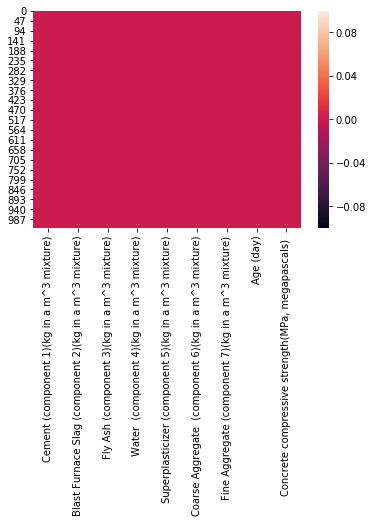

In [7]:
sns.heatmap(df.isnull())

Distribution of variabels

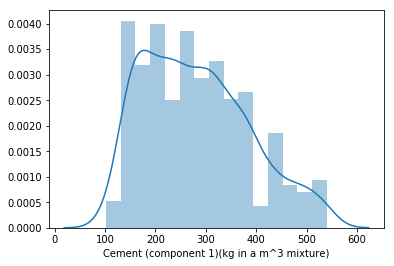

In [8]:
sns.distplot(df['Cement (component 1)(kg in a m^3 mixture)'])

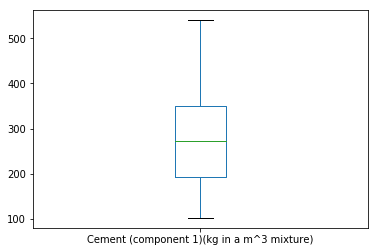

In [9]:
df['Cement (component 1)(kg in a m^3 mixture)'].plot.box()

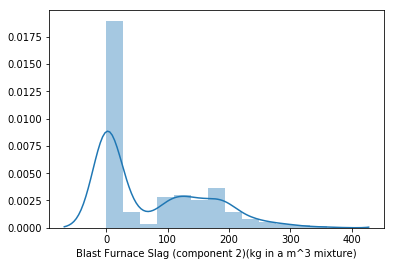

In [10]:
sns.distplot(df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'])

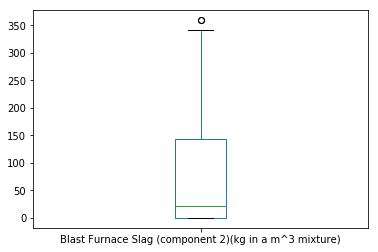

In [11]:
df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].plot.box()

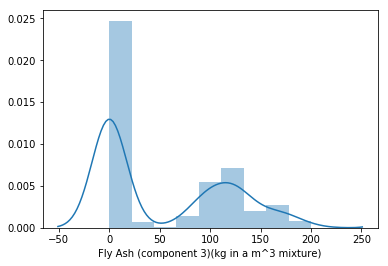

In [12]:
sns.distplot(df['Fly Ash (component 3)(kg in a m^3 mixture)'])

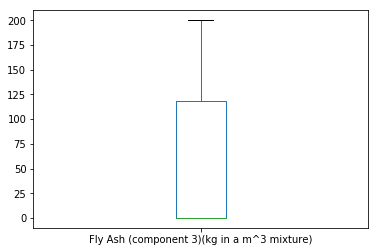

In [13]:
df['Fly Ash (component 3)(kg in a m^3 mixture)'].plot.box()

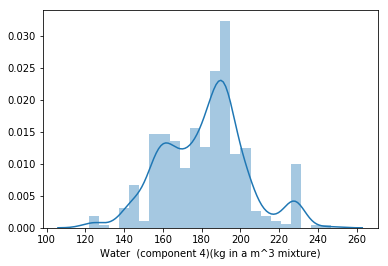

In [14]:
sns.distplot(df['Water  (component 4)(kg in a m^3 mixture)'])

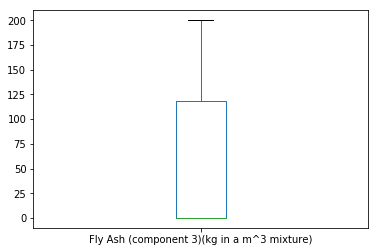

In [15]:
df['Fly Ash (component 3)(kg in a m^3 mixture)'].plot.box()

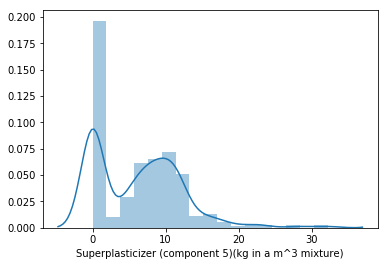

In [16]:
sns.distplot(df['Superplasticizer (component 5)(kg in a m^3 mixture)'])

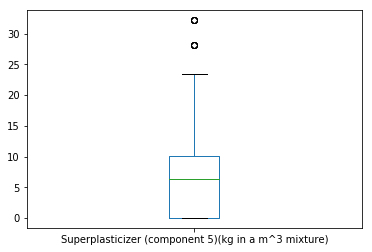

In [17]:
df['Superplasticizer (component 5)(kg in a m^3 mixture)'].plot.box()

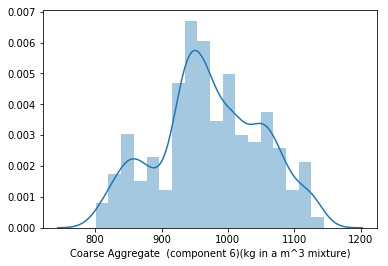

In [18]:
sns.distplot(df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'])

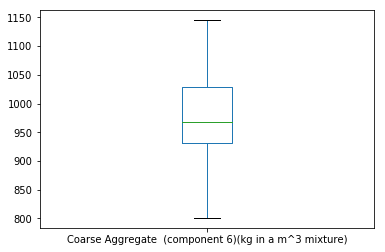

In [19]:
df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'].plot.box()

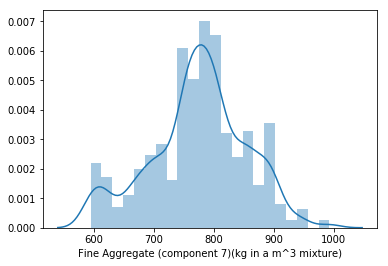

In [20]:
sns.distplot(df['Fine Aggregate (component 7)(kg in a m^3 mixture)'])

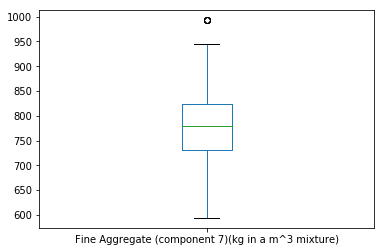

In [21]:
df['Fine Aggregate (component 7)(kg in a m^3 mixture)'].plot.box()

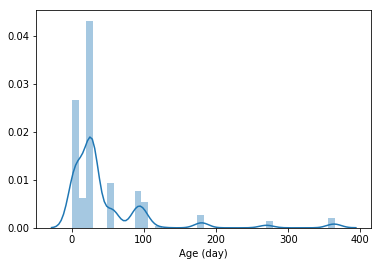

In [22]:
sns.distplot(df['Age (day)'])

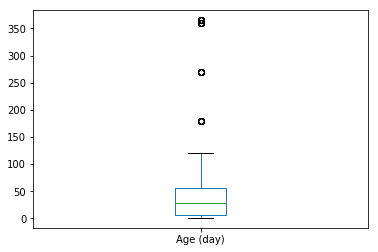

In [23]:
df['Age (day)'].plot.box()

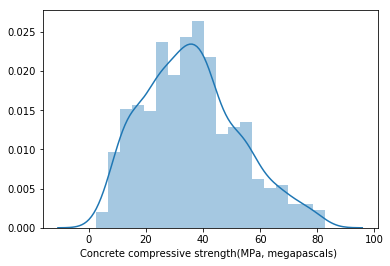

In [24]:
sns.distplot(df['Concrete compressive strength(MPa, megapascals) '])

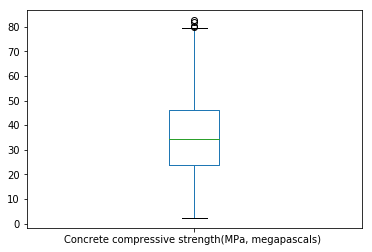

In [25]:
df['Concrete compressive strength(MPa, megapascals) '].plot.box()

correlation of variables

In [26]:
df.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


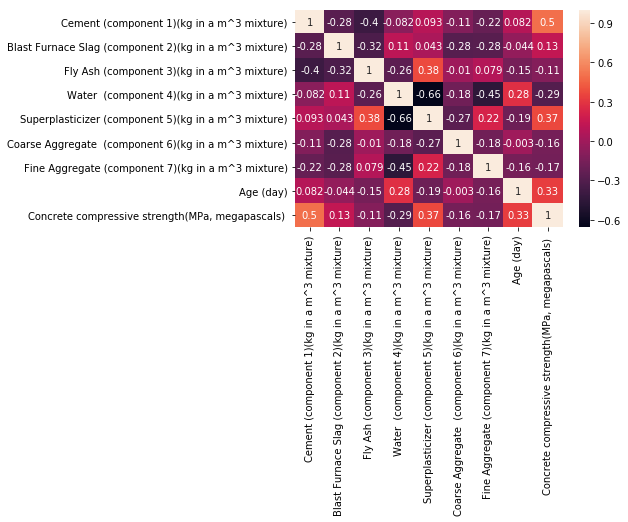

In [27]:
sns.heatmap(df.corr(),annot=True)

Highest correlation between independent and dependent variable and  a linear regression line between them

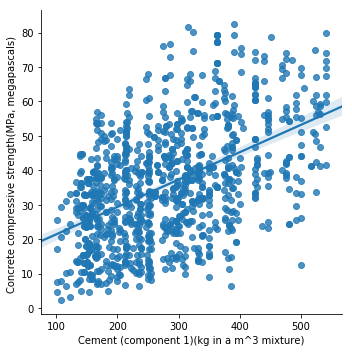

In [28]:
sns.lmplot(x='Cement (component 1)(kg in a m^3 mixture)',y='Concrete compressive strength(MPa, megapascals) ',data=df)

Transforming Age variable

In [29]:
from scipy.stats import boxcox
df['Age (day)']=boxcox(df['Age (day)'],.5)


Removing Outlier

In [30]:
from scipy import stats
newdf=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [31]:
x=newdf.iloc[:,0:-1]
print(x.shape)
x.head()

(981, 8)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,8.583005
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,8.583005
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,16.973666
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,8.583005
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,8.583005


scaling of variable in DataFrame x

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [33]:
y=newdf.iloc[:,-1]
print(y.shape)
y.head()

(981,)


0    79.986111
1    61.887366
5    47.029847
7    36.447770
8    45.854291
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

split the data

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=118)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(765, 8)
(765,)
(216, 8)
(216,)


Applying LinearRegression

In [36]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.coef_
lm.intercept_
pre=lm.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pre))
print('MSE = ',mean_squared_error(y_test,pre))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pre)))
print('R2_score = ',r2_score(y_test,pre))
print('Training_score = ',lm.score(x_train,y_train))

MAE =  4.985782724992959
MSE =  46.30288337647488
RMSE =  6.804622206741156
R2_score =  0.83081114377466
Training_score =  0.775888166839587


Applying Lasso

In [37]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
pred=la.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',la.score(x_train,y_train))

MAE =  9.774531570789518
MSE =  143.8458988945639
RMSE =  11.993577401866547
R2_score =  0.4743929247602293
Training_score =  0.43372573109601953


Applying Ridge

In [38]:
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(x_train,y_train)
pred=ri.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',ri.score(x_train,y_train))

MAE =  5.0372236174216525
MSE =  46.55788898968112
RMSE =  6.823334154918776
R2_score =  0.8298793636157742
Training_score =  0.7730994403492522


Applying Elastinet

In [39]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred=en.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',en.score(x_train,y_train))

MAE =  12.842090664517833
MSE =  247.49743491902208
RMSE =  15.732051198716018
R2_score =  0.09565441978652889
Training_score =  0.0902137220130288


Applying KNeighborsRegressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor
kr=KNeighborsRegressor()
kr.fit(x_train,y_train)
pred=kr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',kr.score(x_train,y_train))

MAE =  4.735568868630653
MSE =  39.712553296206984
RMSE =  6.30178968993785
R2_score =  0.8548919423582421
Training_score =  0.8840894256692632


Applying DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',dtr.score(x_train,y_train))

MAE =  4.085946040604463
MSE =  37.983205452273914
RMSE =  6.163051634723979
R2_score =  0.8612109091783396
Training_score =  0.9960666332158645


Ensemble Technique

Applying GradientBoostingRegressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_depth=4)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',gbr.score(x_train,y_train))

MAE =  2.7235420159031145
MSE =  14.161555467359735
RMSE =  3.763184219163305
R2_score =  0.9482542512004419
Training_score =  0.9704081526580072


Applying AdaBoostRegressor

In [43]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',adb.score(x_train,y_train))

MAE =  5.901323886504083
MSE =  48.61250399066083
RMSE =  6.972266775637664
R2_score =  0.8223718838078149
Training_score =  0.8157079243405173


Applying RandomForestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',rf.score(x_train,y_train))

MAE =  3.243841946918415
MSE =  19.213496976467034
RMSE =  4.383320314153077
R2_score =  0.9297946620061015
Training_score =  0.9766435837491017


Why I select GradientBoostingRegressor as final Model


I get maximum R2_score in GradientBoostingRegressor as compared to other model and we also achive the lowest Mean_Squared_Error in this model

 GradientBoostingRegressor

MAE =  2.7235420159031145 ,
MSE =  14.161555467359735 ,
RMSE =  3.763184219163305 ,
R2_score =  0.9482542512004419 


In [45]:
from sklearn.externals import joblib 

In [46]:
joblib.dump(gbr, 'model_Concrete_data.csv')

['model_Concrete_data.csv']

In [47]:
Model=joblib.load('model_Concrete_data.csv')

In [48]:
Model.predict(x_test)

array([37.47484285, 34.69706299, 65.41815491, 33.00059987, 49.80960382,
       55.295672  ,  7.84584965, 13.3658145 , 21.5116071 , 49.36365558,
       68.08215363, 72.09026914, 20.86290482, 38.33400897, 45.51761669,
       62.16944727, 46.51092778, 14.4141884 , 53.32712802, 19.57196889,
       28.16717115, 12.7432211 , 27.61541347, 40.70379897, 33.40038648,
       35.22433092, 30.48197607, 32.7844686 ,  6.03374068, 17.49873285,
       43.03282549, 34.34706398, 42.12876739, 10.08525571, 27.25170652,
       18.72557166, 21.31939244, 41.23809779, 60.86642793, 15.78748273,
       27.14015814, 32.40974908, 36.17610613, 19.49371058, 24.57615123,
       23.49646313, 29.33465006, 19.02089539, 38.43212119, 45.63938634,
       46.07448304, 25.09183168, 40.90315574, 41.26296221, 23.20662938,
       24.70974288, 68.92452558, 14.82140695, 54.79473624, 13.11666932,
       34.97448836, 42.60527985, 42.88280839, 41.40849426, 18.98315891,
       30.71068942, 53.20500123, 38.41141706, 26.98116079, 32.22